<a href="https://colab.research.google.com/github/AnamayaSaraogi/Eczema-detection/blob/main/eczema_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/My Drive/eczema_eyes/eczema'

# Check if images are accessible
print("Images in dataset:", os.listdir(dataset_path))

Images in dataset: ['eczema-lids-1.jpg', 'eczema-lids-10.jpg', 'eczema-lids-11.jpg', 'eczema-lids-12.jpg', 'eczema-lids-14.jpg', 'eczema-lids-2.jpg', 'eczema-lids-3.jpg', 'eczema-lids-4.jpg', 'eczema-lids-5.jpg', 'eczema-lids-6.jpg', 'eczema-lids-7.jpg', 'eczema-lids-8.jpg', 'eczema-lids-9.jpg']


In [ ]:
!pip install opencv-python matplotlib


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
eczema_folder_path = '/content/drive/MyDrive/eczema_eyes/eczema'
image_files = [f for f in os.listdir(eczema_folder_path) if f.endswith(('png', 'jpg', 'jpeg'))]

images = []
for img_file in image_files:
    img_path = os.path.join(eczema_folder_path, img_file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize all images to a uniform size (224x224 is common)
    images.append(img)

images = np.array(images)


Number of augmented images saved: 10


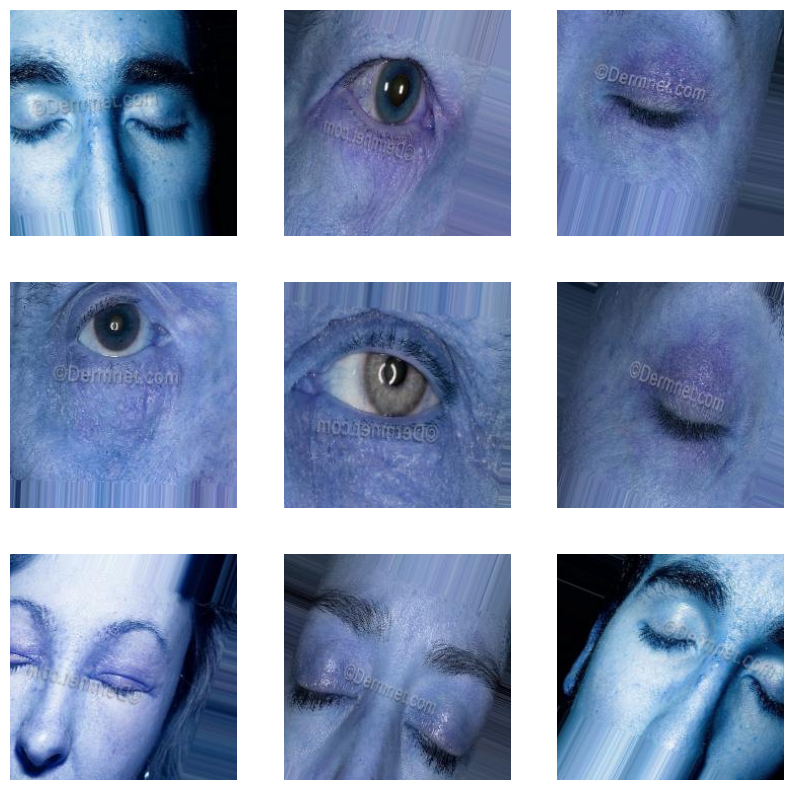

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

# Create a directory for augmented images in the local environment
os.makedirs('/content/augmented_images', exist_ok=True)

# Apply data augmentation
datagen = ImageDataGenerator(
    rotation_range=30,  # Rotate images by up to 30 degrees
    width_shift_range=0.2,  # Shift images horizontally by 20%
    height_shift_range=0.2,  # Shift images vertically by 20%
    shear_range=0.2,  # Shear images
    zoom_range=0.2,  # Zoom into images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # How to fill in pixels when images are transformed
)

# Load the dataset from the 'eczema' folder
eczema_folder_path = '/content/drive/MyDrive/eczema_eyes/eczema'
image_files = [f for f in os.listdir(eczema_folder_path) if f.endswith(('png', 'jpg', 'jpeg'))]

images = []
for img_file in image_files:
    img_path = os.path.join(eczema_folder_path, img_file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to 224x224
    images.append(img)

images = np.array(images)

# Create the generator
augmented_images = datagen.flow(images, batch_size=1, save_to_dir='/content/augmented_images', save_prefix='aug', save_format='jpg')

# Manually run a few iterations of augmentation
for i in range(10):  # Run for 10 iterations
    _ = next(augmented_images)  # Generate a batch of augmented images

# Wait for images to be saved
time.sleep(5)  # Wait for 5 seconds to allow image saving

# List the augmented images
augmented_img_files = os.listdir('/content/augmented_images')
print(f"Number of augmented images saved: {len(augmented_img_files)}")  # Check how many images are saved

# If there are images, visualize the first 9
if len(augmented_img_files) > 0:
    plt.figure(figsize=(10, 10))
    for i in range(min(9, len(augmented_img_files))):  # Avoid IndexError if fewer than 9 images are saved
        img = cv2.imread(os.path.join('/content/augmented_images', augmented_img_files[i]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis('off')
    plt.show()
else:
    print("No augmented images found. Please check if augmentation is working.")


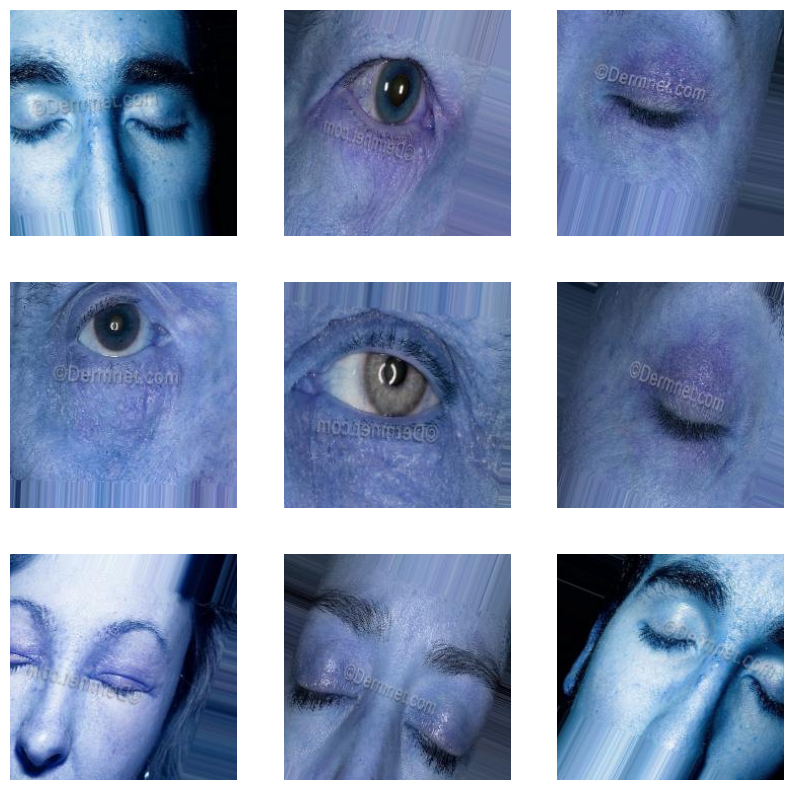

In [ ]:
# Visualize the first 9 augmented images
plt.figure(figsize=(10, 10))
for i in range(min(9, len(augmented_img_files))):  # Avoid IndexError if fewer than 9 images are saved
    img = cv2.imread(os.path.join('/content/augmented_images', augmented_img_files[i]))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()


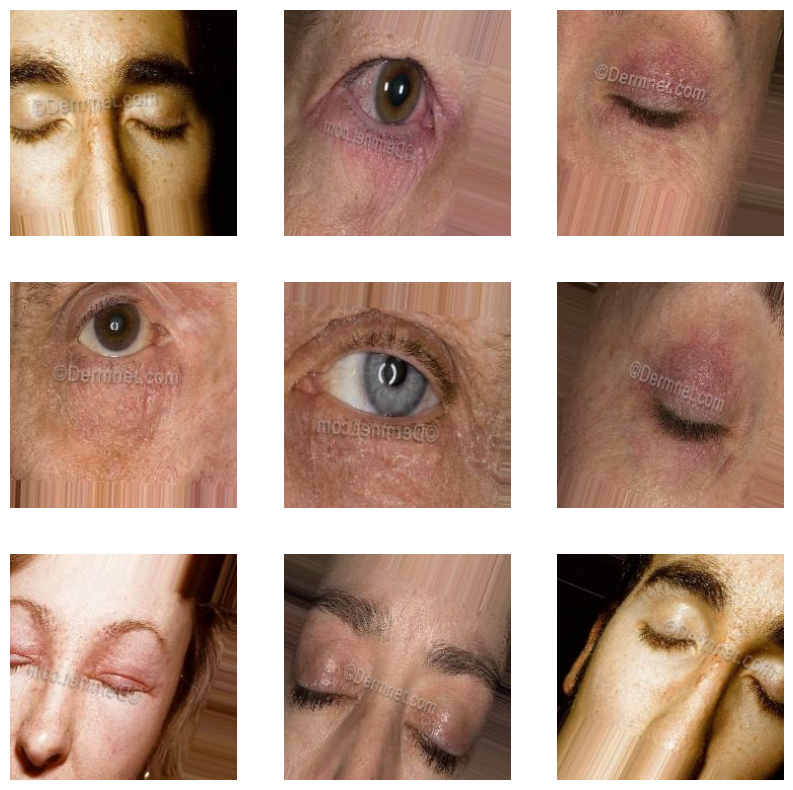

In [ ]:
# Visualize the first 9 augmented images without converting color
plt.figure(figsize=(10, 10))
for i in range(min(9, len(augmented_img_files))):  # Avoid IndexError if fewer than 9 images are saved
    img = cv2.imread(os.path.join('/content/augmented_images', augmented_img_files[i]))
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)  # Directly display the image without conversion
    plt.axis('off')
plt.show()


In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array

# Load augmented images
augmented_img_files = os.listdir('/content/augmented_images')

images = []
labels = []

# Assuming the 'eczema' images are for the positive class (1), and 'normal' for negative (0)
# Here we're only using 'eczema' as per your instructions
for img_file in augmented_img_files:
    img_path = os.path.join('/content/augmented_images', img_file)
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to 224x224
    img = img_to_array(img)  # Convert the image to a numpy array
    img = img / 255.0  # Normalize the pixel values to [0, 1]

    # Label the images (since we are only using eczema images, label them as 1)
    images.append(img)
    labels.append(1)

images = np.array(images)
labels = np.array(labels)

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")


Training data shape: (8, 224, 224, 3)
Validation data shape: (2, 224, 224, 3)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

# Load the pre-trained MobileNetV2 model (without the top layer)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to avoid training its layers
base_model.trainable = False

# Create the model
model = models.Sequential([
    base_model,  # Add the pre-trained base model
    layers.GlobalAveragePooling2D(),  # Global average pooling layer
    layers.Dense(512, activation='relu'),  # Fully connected layer
    layers.Dropout(0.5),  # Dropout to reduce overfitting
    layers.Dense(1, activation='sigmoid')  # Sigmoid output for binary classification (eczema or not)
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary to check the architecture
model.summary()

# Train the model using the training and validation data
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=2)


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,914,369 (11.12 MB)

 Trainable params: 656,385 (2.50 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7667 - loss: 0.4875 - val_accuracy: 1.0000 - val_loss: 3.9441e-07
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - accuracy: 1.0000 - loss: 4.1972e-07 - val_accuracy: 1.0000 - val_loss: 3.2831e-10
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 1.0000 - loss: 9.8433e-09 - val_accuracy: 1.0000 - val_loss: 4.5509e-12
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 1.0000 - loss: 1.7756e-09 - val_accuracy: 1.0000 - val_loss: 2.7720e-13
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 1.0000 - loss: 1.1567e-10 - val_accuracy: 1.0000 - val_loss: 4.1086e-14
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 1.0000 - loss: 1.2572e-10 - val_accuracy: 1.0000 - val_loss: 1.1062e-14
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 1.0000 - loss: 2.3429e-12 - val_accuracy: 1.0000 - val_loss: 4.4638e-15
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 1.0000 

In [ ]:
# Evaluate the model on the validation set
loss, accuracy = model.evaluate(X_val, y_val)

print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 1.1386e-15
Validation Loss: 1.1386150396215287e-15
Validation Accuracy: 1.0


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


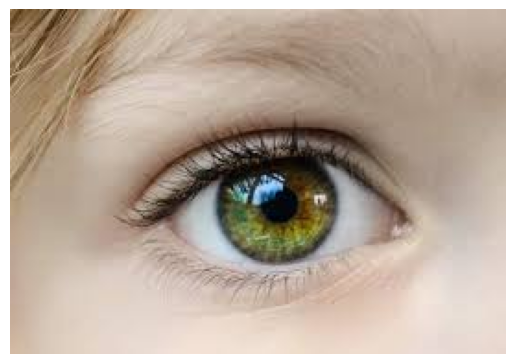

Prediction for noneczema2.jpg:
Eczema Detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


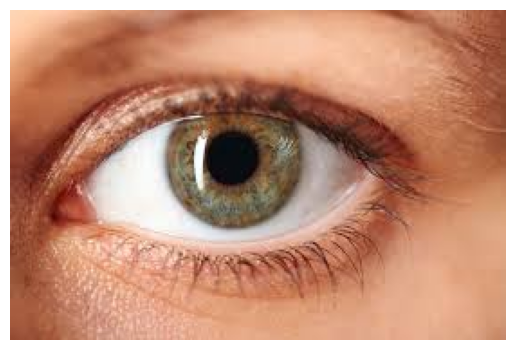

Prediction for noneczema1.jpg:
Eczema Detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


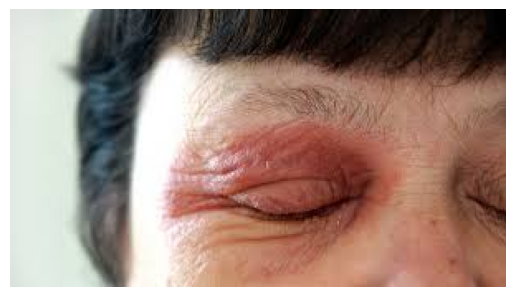

Prediction for eczema3.jpg:
Eczema Detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


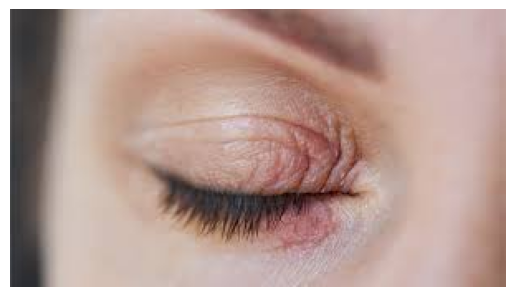

Prediction for eczema5.jpg:
Eczema Detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


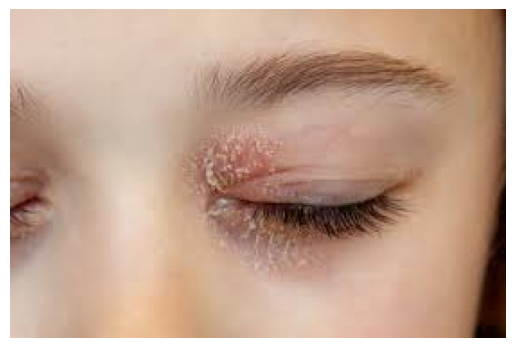

Prediction for eczema2.jpg:
Eczema Detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


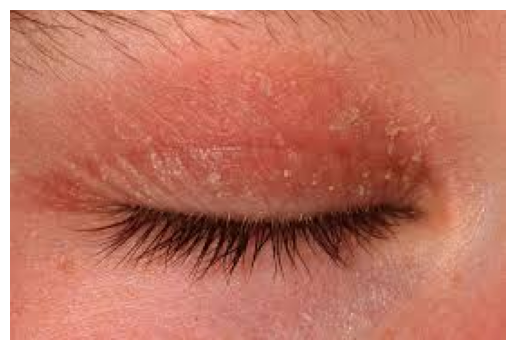

Prediction for eczema4.jpg:
Eczema Detected
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


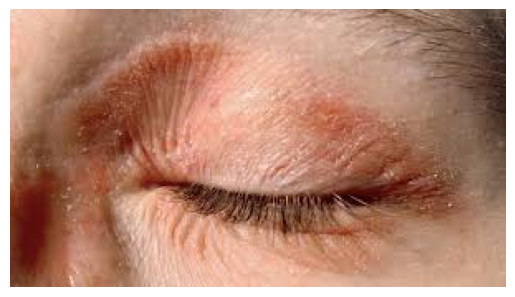

Prediction for eczema1.jpg:
Eczema Detected


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder with unseen images
unseen_image_path = '/content/drive/MyDrive/eczema_eyes/unseen_images/'  # Update with your folder path

# List of unseen image files
unseen_img_files = os.listdir(unseen_image_path)

# Loop through each unseen image and make predictions
for img_file in unseen_img_files:
    img_path = os.path.join(unseen_image_path, img_file)

    # Load and preprocess the image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize to match the input shape
    img = img / 255.0  # Normalize the image
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Predict with the model
    prediction = model.predict(img)

    # Visualize the result
    plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    # Print prediction result
    print(f"Prediction for {img_file}:")
    if prediction >= 0.5:
        print("Eczema Detected")
    else:
        print("No Eczema")
